In [37]:
import numpy as np
import pandas as pd
import datetime as datetime
import time

In [20]:
data_folder = "C:/Users/minho/kaggle dataset/g-research-crypto-forecasting/input/"

In [21]:
crypto_df = pd.read_csv(data_folder + 'train.csv')
crypto_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [22]:
asset_details = pd.read_csv(data_folder + 'asset_details.csv')
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [23]:
btc = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp")
btc_mini = btc.iloc[-200:]
btc_mini

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1632170460,1,5694.0,43558.393750,43588.680000,43427.28,43447.003750,191.442881,43493.981877,-0.000805
1632170520,1,2528.0,43449.818571,43495.954028,43414.33,43440.000000,80.692018,43455.988146,0.000418
1632170580,1,3985.0,43427.082310,43455.218478,43327.29,43360.723750,117.332513,43391.956795,0.000125
1632170640,1,2185.0,43362.572857,43454.990000,43348.06,43427.242857,76.361478,43403.880056,0.000956
1632170700,1,2623.0,43419.832500,43467.000000,43351.15,43375.040000,76.018320,43408.267118,-0.000430
...,...,...,...,...,...,...,...,...,...
1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN


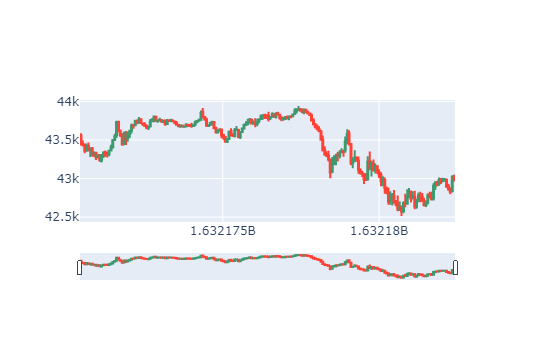

In [24]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=btc_mini.index
                                     , open=btc_mini['Open']
                                     , high=btc_mini['High']
                                     , low=btc_mini['Low']
                                     , close=btc_mini['Close'])])
fig.show()

In [25]:
eth = crypto_df[crypto_df["Asset_ID"]==6].set_index("timestamp")
eth.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956200 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956200 non-null  int64  
 1   Count     1956200 non-null  float64
 2   Open      1956200 non-null  float64
 3   High      1956200 non-null  float64
 4   Low       1956200 non-null  float64
 5   Close     1956200 non-null  float64
 6   Volume    1956200 non-null  float64
 7   VWAP      1956200 non-null  float64
 8   Target    1955860 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.2 MB


In [26]:
eth.isna().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      340
dtype: int64

In [27]:
btc.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


In [28]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956282 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Asset_ID  int64  
 1   Count     float64
 2   Open      float64
 3   High      float64
 4   Low       float64
 5   Close     float64
 6   Volume    float64
 7   VWAP      float64
 8   Target    float64
dtypes: float64(8), int64(1)
memory usage: 149.3 MB


In [29]:
beg_btc = btc.index[0].astype('datetime64[s]')
end_btc = btc.index[-1].astype('datetime64[s]')
beg_eth = eth.index[0].astype('datetime64[s]')
end_eth = eth.index[-1].astype('datetime64[s]')

print('BTC data goes from ', beg_btc, 'to ', end_btc)
print('Ethereum data goes from ', beg_eth, 'to ', end_eth)

BTC data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00
Ethereum data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00


In [30]:
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60     1956043
120        100
180         23
300          5
540          4
Name: timestamp, dtype: int64

In [31]:
eth = eth.reindex(range(eth.index[0], eth.index[-1]+60,60), method='pad')

In [32]:
eth.reindex(range(eth.index[0], eth.index[-1]+60,60), method='pad')

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,6,173.0,738.302500,746.00,732.51,738.507500,335.987856,738.839291,-0.004809
1514764920,6,192.0,738.507500,745.14,732.49,738.260000,232.793141,738.268967,-0.004441
1514764980,6,120.0,738.332500,745.12,730.00,737.502500,174.138031,737.994457,-0.004206
1514765040,6,156.0,737.222500,744.69,728.93,737.102500,165.383926,737.303631,-0.002205
1514765100,6,118.0,736.530000,743.80,727.11,735.705000,193.078039,736.163026,-0.001744
...,...,...,...,...,...,...,...,...,...
1632182160,6,2162.0,2973.728686,2976.10,2962.09,2964.711429,751.256906,2968.339295,NaN
1632182220,6,1976.0,2965.461446,2967.95,2958.05,2960.845714,729.113672,2963.499199,NaN
1632182280,6,2262.0,2960.321429,2962.60,2954.14,2957.398571,807.935362,2958.464868,NaN


In [33]:
eth.shape

(1956960, 9)

In [34]:
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60    1956959
Name: timestamp, dtype: int64

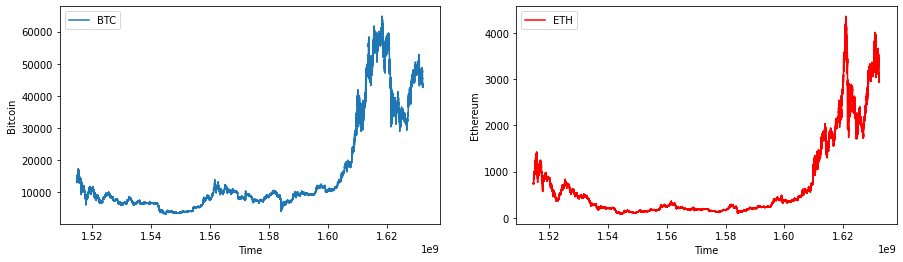

In [35]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,4))

btc = btc.reindex(range(btc.index[0], btc.index[-1]+60, 60), method='pad')

ax = f.add_subplot(121)
plt.plot(btc['Close'], label='BTC')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')

ax2 = f.add_subplot(122)
ax2.plot(eth['Close'], color='red', label='ETH')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum')

# plt.tight_layout()
plt.show()

In [38]:
np.int32(time.mktime(datetime.datetime.strptime('01/06/2021', "%d/%m/%Y").timetuple()))

1622473200

In [39]:
import time

# datetime 두번 해야함.
totimestamp = lambda s: np.int32(time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple()))

btc_mini_2021 = btc.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]
eth_mini_2021 = eth.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]

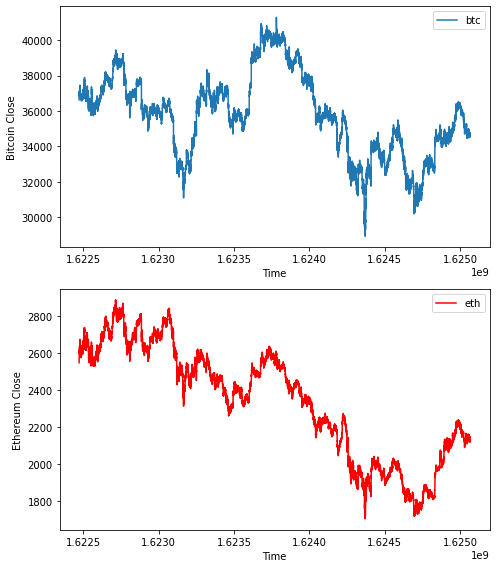

In [40]:
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(btc_mini_2021['Close'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Close')

ax2 = f.add_subplot(212)
ax2.plot(eth_mini_2021['Close'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Close')

plt.tight_layout()
plt.show()

In [41]:
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

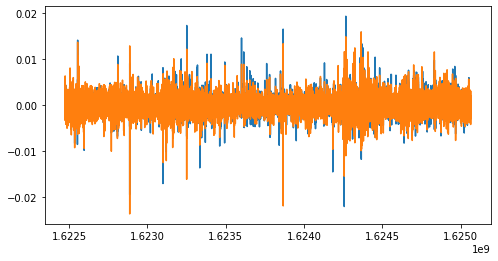

In [42]:
import scipy.stats as stats

lret_btc = log_return(btc_mini_2021.Close)[1:]
lret_eth = log_return(eth_mini_2021.Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
lret_eth.rename('lret_eth', inplace=True)

plt.figure(figsize=(8,4))
plt.plot(lret_btc);
plt.plot(lret_eth);
plt.show()

Text(0.5, 1.0, 'Correlation between BTC and ETH over time')

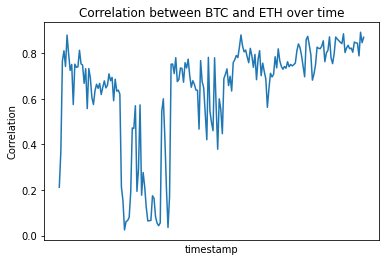

In [43]:
lret_btc_long = log_return(btc.Close)[1:]
lret_eth_long = log_return(eth.Close)[1:]
lret_btc_long.rename('lret_btc', inplace=True)
lret_eth_long.rename('lret_eth', inplace=True)
two_assets = pd.concat([lret_btc_long, lret_eth_long], axis=1)

corr_time = two_assets.groupby(two_assets.index//(10000*60)).corr().loc[:, "lret_btc"].loc[:, "lret_eth"]
corr_time.plot()
plt.xticks([])
plt.ylabel('Correlation')
plt.title('Correlation between BTC and ETH over time')

In [44]:
two_assets

,lret_btc,lret_eth
timestamp,,
1514764920,-0.001595,-0.000335
1514764980,-0.001939,-0.001027
1514765040,-0.002414,-0.000543
1514765100,-0.003137,-0.001898
1514765160,-0.000569,-0.000687
...,...,...
1632182160,-0.002007,-0.003137
1632182220,-0.000910,-0.001305
1632182280,-0.000770,-0.001165


In [45]:
two_assets.index//(10000*60) #// : integer division operator
two_assets.groupby(two_assets.index//(10000*60)).count()

,lret_btc,lret_eth
timestamp,,
2524,3918,3918
2525,10000,10000
2526,10000,10000
2527,10000,10000
2528,10000,10000
...,...,...
2716,10000,10000
2717,10000,10000
2718,10000,10000


In [46]:
all_assets_2021 = pd.DataFrame([])
for asset_id, asset_name in zip(asset_details.Asset_ID, asset_details.Asset_Name) :
    asset = crypto_df[crypto_df["Asset_ID"]==asset_id].set_index("timestamp")
    asset = asset.loc[totimestamp('01/01/2021'):totimestamp('01/05/2021')]
    asset = asset.reindex(range(asset.index[0], asset.index[-1]+60, 60), method='pad')
    lret = log_return(asset.Close.fillna(0))[1:]
    all_assets_2021 = all_assets_2021.join(lret, rsuffix=asset_name, how="outer")

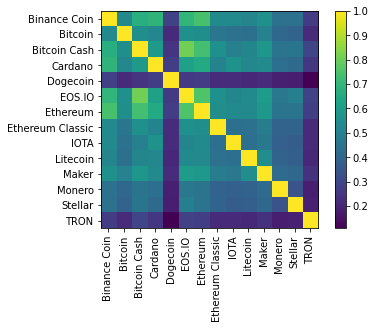

In [47]:
plt.imshow(all_assets_2021.corr());
plt.yticks(asset_details.Asset_ID.values, asset_details.Asset_Name.values);
plt.xticks(asset_details.Asset_ID.values, asset_details.Asset_Name.values, rotation='vertical');
plt.colorbar()

In [48]:
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close, asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close, asset.Open) - asset.Low

X_btc = pd.concat([log_return(btc.VWAP, periods=5), 
                   log_return(btc.VWAP, periods=1).abs(),
                   upper_shadow(btc),
                   lower_shadow(btc)], axis=1)
y_btc = btc.Target

X_eth = pd.concat([log_return(eth.VWAP, periods=5),
                   log_return(eth.VWAP, periods=1),
                   upper_shadow(eth),
                   lower_shadow(eth)], axis=1)
y_eth = eth.Target
X_btc

,VWAP,VWAP,0,1
timestamp,,,,
1514764860,NaN,NaN,163.624000,169.084000
1514764920,NaN,0.000961,217.264000,148.102000
1514764980,NaN,0.002481,176.500000,200.314000
1514765040,NaN,0.001629,196.488000,191.760000
1514765100,NaN,0.003489,189.900000,170.474000
...,...,...,...,...
1632182160,0.000074,0.001123,18.070849,20.752857
1632182220,-0.001954,0.001303,27.802857,19.845714
1632182280,-0.002773,0.000828,28.114286,29.820000


In [161]:
train_window = [totimestamp('01/05/2021'), totimestamp('30/05/2021')]
test_window = [totimestamp('01/06/2021'), totimestamp('30/06/2021')]

X_btc_train = X_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()
y_btc_train = y_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()

X_btc_test = X_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()
y_btc_test = y_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()

X_eth_train = X_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()
y_eth_train = y_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()

X_eth_test = X_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()
y_eth_test = y_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_btc_train_scaled = scaler.fit_transform(X_btc_train)
X_btc_test_scaled = scaler.transform(X_btc_test)

X_eth_train_scaled = scaler.fit_transform(X_eth_train)
X_eth_test_scaled = scaler.transform(X_eth_test)

In [192]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_btc_train_scaled, y_btc_train)
y_pred_lr_btc = lr.predict(X_btc_test_scaled)

lr.fit(X_eth_train_scaled, y_eth_train)
y_pred_lr_eth = lr.predict(X_eth_test_scaled)

In [193]:
from sklearn.multioutput import MultiOutputRegressor

X_both_train = np.concatenate((X_btc_train_scaled, X_eth_train_scaled), axis=1)
X_both_test = np.concatenate((X_btc_test_scaled, X_eth_test_scaled), axis=1)
y_both_train = np.column_stack((y_btc_train, y_eth_train))
y_both_test = np.column_stack((y_btc_test, y_eth_test))

mlr = MultiOutputRegressor(LinearRegression())
mlr.fit(X_both_train, y_both_train)
y_pred_mlr_both = mlr.predict(X_both_test)

In [194]:
y_pred_lr_both

array([[ 6.93260656e-05, -1.84326329e-04],
       [ 2.44659696e-06, -1.56690981e-04],
       [-2.39384086e-07, -1.20157163e-04],
       ...,
       [ 1.16032883e-04,  6.44569842e-05],
       [ 1.29101468e-04,  3.53142682e-05],
       [-8.02645125e-05,  1.64696945e-05]])

In [195]:
np.corrcoef(y_pred_lr_btc, y_btc_test), np.corrcoef(y_pred_lr_eth, y_eth_test)

(array([[ 1.       , -0.0117282],
        [-0.0117282,  1.       ]]),
 array([[1.        , 0.02118997],
        [0.02118997, 1.        ]]))

In [197]:
np.corrcoef(y_pred_mlr_both[:,0], y_btc_test), np.corrcoef(y_pred_mlr_both[:,1], y_eth_test)

(array([[1.        , 0.00990065],
        [0.00990065, 1.        ]]),
 array([[1.        , 0.05097658],
        [0.05097658, 1.        ]]))